In [ ]:
!pip install lazypredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
read_malicioso = "/content/drive/MyDrive/Ano 5/IoT - Projeto/Segurança cibernética/Dataset/Novos dados/malicioso.csv"
read_legitimo = "/content/drive/MyDrive/Ano 5/IoT - Projeto/Segurança cibernética/Dataset/Novos dados/legitimo.csv"

legitimo = pd.read_csv(read_legitimo, delimiter="\t")
malicioso = pd.read_csv(read_malicioso, delimiter="\t")

print(legitimo.shape)
print(malicioso.shape)

(24559, 17)
(105981, 17)


<ipython-input-3-8c5958b1a0e9>:5: DtypeWarning: Columns (6,9,11,12,13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  malicioso = pd.read_csv(read_malicioso, delimiter="\t")


In [ ]:
print(legitimo.keys())
print(malicioso.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.ver'],
      dtype='object')
Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.ver'],
      dtype='object')


# Analise geral

In [ ]:
columns = ['mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos', 'mqtt.ver', 'mqtt.hdrflags', 'mqtt.msgtype']
legitimo = legitimo.drop(columns, axis=1)
malicioso = malicioso.drop(columns, axis=1)
print(legitimo.keys())
print(malicioso.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len'], dtype='object')
Index(['tcp.flags', 'tcp.time_delta', 'tcp.len'], dtype='object')


In [ ]:
print(legitimo.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len'], dtype='object')


In [ ]:
legitimo.head()

,tcp.flags,tcp.time_delta,tcp.len
0,0x0018,0.000000,28
1,0x0018,0.002873,28
2,0x0018,0.002320,2
3,0x0018,0.002249,2
4,0x0010,0.065713,0


In [ ]:
malicioso.head()

,tcp.flags,tcp.time_delta,tcp.len
0,0x0002,0.0,0
1,0x0002,0.0,0
2,0x0002,0.0,0
3,0x0002,0.0,0
4,0x0002,0.0,0


Tratamento dos campos N/A

In [ ]:
legitimo.fillna({'tcp.flags': 0, 'tcp.time_delta': 0, 'tcp.len': 0}, inplace=True)
malicioso.fillna({'tcp.flags': 0, 'tcp.time_delta': 0, 'tcp.len': 0}, inplace=True)
print("executado")

executado


In [ ]:
legitimo.head()

,tcp.flags,tcp.time_delta,tcp.len
0,0x0018,0.000000,28
1,0x0018,0.002873,28
2,0x0018,0.002320,2
3,0x0018,0.002249,2
4,0x0010,0.065713,0


In [ ]:
malicioso.head()

,tcp.flags,tcp.time_delta,tcp.len
0,0x0002,0.0,0
1,0x0002,0.0,0
2,0x0002,0.0,0
3,0x0002,0.0,0
4,0x0002,0.0,0


In [ ]:
# rotulacao
legitimo["target"] = 0
malicioso["target"] = 1
print(legitimo.keys())
print(malicioso.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'target'], dtype='object')
Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'target'], dtype='object')


In [ ]:
# mistura do arquivo malicioso
# o arquivo precisa ser misturado porque foram usadas duas ferramentas para executar o ataque

from sklearn.model_selection import train_test_split

one, two = train_test_split(malicioso, test_size=0.33, shuffle=True, random_state=42)
# uniao dos arquivos misturados
malicioso = pd.concat([one, two], ignore_index=True)

malicioso.head()

,tcp.flags,tcp.time_delta,tcp.len,target
0,0x0010,6.358300e-05,0,1
1,0x0018,5.200000e-08,2896,1
2,0x0010,1.144900e-05,0,1
3,0x0010,4.805000e-05,0,1
4,0x0018,-2.550000e-07,2896,1


# Balanceamento

In [ ]:
data_df = pd.concat([legitimo, malicioso], ignore_index=True)

def create_balanced_dataset(df):
    num_spam = df[df['target'] == 0].shape[0] # Pegarquantidade de dados do legitimo
    spam_df = df[df['target'] == 0].copy() # Os dados do legitimo

    ham_df = df[df['target'] == 1].sample(num_spam, random_state=123) # Pegar os dados do malicioso
    return pd.concat([ham_df, spam_df]) # retorna dois dataframes concatenados

data = create_balanced_dataset(data_df) # dado balanceado contendo legitimo

print(data.shape)

(49118, 4)


In [ ]:
print(data['target'].value_counts())

target
1    24559
0    24559
Name: count, dtype: int64


In [ ]:
data.keys()

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'target'], dtype='object')

In [ ]:
data.head()

,tcp.flags,tcp.time_delta,tcp.len,target
126267,0x0010,8.000000e-08,1448,1
45066,0x0010,1.221030e-04,0,1
53564,0x0010,1.943600e-05,0,1
124046,0x0018,3.900000e-08,2896,1
46095,0x0018,3.748162e-02,2896,1


# Tratamento geral

In [ ]:
# Removendo letras e vírgulas, mantendo apenas números e pontos
data['tcp.flags'] = data['tcp.flags'].str.replace(r'[^0-9.]', '', regex=True)
data.head()

,tcp.flags,tcp.time_delta,tcp.len,target
126267,00010,8.000000e-08,1448,1
45066,00010,1.221030e-04,0,1
53564,00010,1.943600e-05,0,1
124046,00018,3.900000e-08,2896,1
46095,00018,3.748162e-02,2896,1


# Treinamento

In [ ]:
# divisao dos dados para treino e teste
train, test = train_test_split(data, test_size=0.33, shuffle=True, random_state=42)

In [ ]:
X_train = train.iloc[:,:-1]
y_train = train['target']
X_test = test.iloc[:,:-1]
y_test = test['target']

# Treinamento

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

# Treinamento com lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 32/32 [04:08<00:00,  7.78s/it]

[LightGBM] [Info] Number of positive: 16444, number of negative: 16465
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 32909, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499681 -> initscore=-0.001276
[LightGBM] [Info] Start training from score -0.001276


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.97,0.97,0.97,0.97,0.33
KNeighborsClassifier,0.97,0.97,0.97,0.97,1.25
RandomForestClassifier,0.96,0.96,0.96,0.96,1.75
BaggingClassifier,0.96,0.96,0.96,0.96,0.32
ExtraTreesClassifier,0.96,0.96,0.96,0.96,1.26
DecisionTreeClassifier,0.96,0.96,0.96,0.96,0.07
ExtraTreeClassifier,0.96,0.96,0.96,0.96,0.05
AdaBoostClassifier,0.96,0.96,0.96,0.96,0.59
LinearSVC,0.81,0.81,0.81,0.81,0.20


In [ ]:
# salvando o modelo treinado pelo lzpredict pq não to confiante
trained_models = clf.models
print(trained_models.keys())

dict_keys(['AdaBoostClassifier', 'BaggingClassifier', 'BernoulliNB', 'CalibratedClassifierCV', 'CategoricalNB', 'DecisionTreeClassifier', 'DummyClassifier', 'ExtraTreeClassifier', 'ExtraTreesClassifier', 'GaussianNB', 'KNeighborsClassifier', 'LabelPropagation', 'LabelSpreading', 'LinearDiscriminantAnalysis', 'LinearSVC', 'LogisticRegression', 'NearestCentroid', 'NuSVC', 'PassiveAggressiveClassifier', 'Perceptron', 'QuadraticDiscriminantAnalysis', 'RandomForestClassifier', 'RidgeClassifier', 'RidgeClassifierCV', 'SGDClassifier', 'SVC', 'XGBClassifier', 'LGBMClassifier'])


In [ ]:
lgbmc_model_save = trained_models['LGBMClassifier']
joblib.dump(lgbmc_model_save, 'lgbmc_model.pkl')
print("executado")

executado


In [ ]:
X_test.keys()

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len'], dtype='object')

🔍 Acurácia: 0.9687
🎯 Precisão: 0.9687
📊 Recall: 0.9687
⚡ F1-Score: 0.9687

📋 Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8094
           1       0.97      0.97      0.97      8115

    accuracy                           0.97     16209
   macro avg       0.97      0.97      0.97     16209
weighted avg       0.97      0.97      0.97     16209



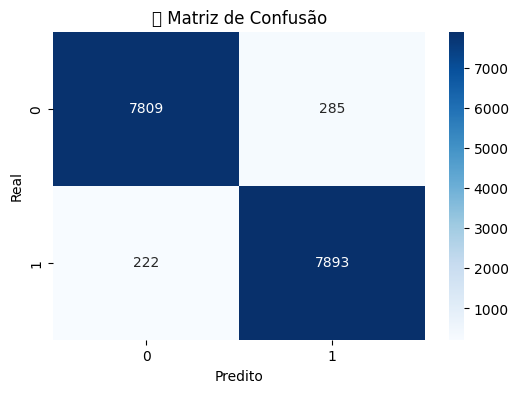

In [ ]:
# metricas so pra confirmar
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# metricas com o modelo da lista do lazypredict
y_pred = lgbmc_model_save.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'🔍 Acurácia: {accuracy:.4f}')
print(f'🎯 Precisão: {precision:.4f}')
print(f'📊 Recall: {recall:.4f}')
print(f'⚡ F1-Score: {f1:.4f}')

print("\n📋 Relatório de Classificação:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('🔵 Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()